# PREDICTION FOR THE 2022/2023 PREMIER LEAGUE WINNER 

##1. Defining the Question

### a) Specifying the Data Analytic Question

###b) Defining the Metric of Success

###c) Understanding the Context

###d) Recording the Experimental Data

###e) Data Relevance

##2. Reading the Data

In [1]:
#Importing the Libraries that we will use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# let's create a function to read the data
def read_data(season):
    season18 = pd.read_csv('season-1718.csv')
    season19 = pd.read_csv('season-1819.csv')
    season20=pd.read_excel('season-1920.xlsx')
    season21=pd.read_csv('season-2021.csv')

    if season=='19':
        return season19
    elif season=='20':
        return season20
    elif season=='21':
        return season21
    elif season=='18':
        return season18
    else:
        print('Invalid season')

# let's print the 18 season data
season18=read_data('18')
print(season18.head())
# let's print the 19 season data
season19 = read_data('19')
print(season19.head())

# let's print the 20 season data
season20 = read_data('20')
print(season20.head())

# let's print the 21 season data
season21 = read_data('21')
print(season21.head())

FileNotFoundError: [Errno 2] No such file or directory: 'season-1718.csv'

In [ ]:
# Checking the number of rows and columns
print(season18.shape)
print(season19.shape)
print(season20.shape)
print(season21.shape)

(380, 65)
(380, 62)
(760, 33)
(380, 106)


##3) Checking the Data

In [ ]:
# Previewing the first five records
season18.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,...,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,...,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29
2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,...,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25
3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51
4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,...,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42


In [ ]:
# Previewing the first five records
season19.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [ ]:
# Previewing the first five records
season20.head()

,Match_Name,Match_Date,Team,Team_Logo,Manager,Captain,Score,Penalties,Fouls,Corners,...,Possession,PassingAccuracy,SucPass,NumofPass,ShotsAccuracy,SucShots,NumofShots,SavesAccuracy,SucSaves,NumofSaves
0,Liverpool vs. Norwich City,2019-08-09,Liverpool,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Jürgen Klopp,Jordan Henderson,4,0,10,11,...,0.57,0,409,521,0.47,7,15,0.83,5,6
1,Liverpool vs. Norwich City,2019-08-09,Norwich City,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Daniel Farke,Grant Hanley,1,0,12,2,...,0.43,0,304,395,0.46,6,13,0.42,3,7
2,West Ham United vs. Manchester City,2019-08-10,West Ham United,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Manuel Pellegrini,Aaron Cresswell,0,0,11,1,...,0.43,0,347,428,0.60,3,5,0.50,4,8
3,West Ham United vs. Manchester City,2019-08-10,Manchester City,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Pep Guardiola,David Silva,5,0,15,1,...,0.57,0,495,564,0.62,8,13,1.00,3,3
4,Burnley vs. Southampton,2019-08-10,Burnley,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Sean Dyche,Ben Mee,3,0,6,2,...,0.46,0,214,346,0.44,4,9,1.00,3,3


In [ ]:
# Previewing the first five records
season21.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


In [ ]:
# Previewing the last five records
season18.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
375,E0,13/05/18,Newcastle,Chelsea,3,0,H,1,0,H,...,2.01,21,1.00,1.90,1.83,2.11,2.03,4.85,3.72,1.80
376,E0,13/05/18,Southampton,Man City,0,1,A,0,0,D,...,2.49,20,1.25,2.01,1.95,1.97,1.91,6.32,4.78,1.51
377,E0,13/05/18,Swansea,Stoke,1,2,A,1,2,A,...,2.06,19,-0.50,1.94,1.88,2.03,1.98,2.08,3.56,3.82
378,E0,13/05/18,Tottenham,Leicester,5,4,H,1,2,A,...,2.84,20,-1.50,1.96,1.86,2.05,2.00,1.38,5.50,8.15
379,E0,13/05/18,West Ham,Everton,3,1,H,1,0,H,...,1.97,21,-0.25,2.09,2.03,1.88,1.84,2.35,3.40,3.28


In [ ]:
# Previewing the last five records
season19.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
375,E0,12/05/2019,Liverpool,Wolves,2,0,H,1,0,H,...,2.31,22,-1.5,1.98,1.91,2.01,1.95,1.32,5.89,9.48
376,E0,12/05/2019,Man United,Cardiff,0,2,A,0,1,A,...,2.95,21,-2.0,2.52,2.32,1.72,1.64,1.30,6.06,9.71
377,E0,12/05/2019,Southampton,Huddersfield,1,1,D,1,0,H,...,2.29,22,-1.5,2.27,2.16,1.80,1.73,1.37,5.36,8.49
378,E0,12/05/2019,Tottenham,Everton,2,2,D,1,0,H,...,2.07,19,-0.5,2.13,2.08,1.85,1.80,1.91,3.81,4.15
379,E0,12/05/2019,Watford,West Ham,1,4,A,0,2,A,...,2.44,19,-0.5,2.25,2.19,1.78,1.72,2.11,3.86,3.41


In [ ]:
# Previewing the last five records
season20.tail()

,Match_Name,Match_Date,Team,Team_Logo,Manager,Captain,Score,Penalties,Fouls,Corners,...,Possession,PassingAccuracy,SucPass,NumofPass,ShotsAccuracy,SucShots,NumofShots,SavesAccuracy,SucSaves,NumofSaves
755,Manchester City vs. Norwich City,2020-07-26,Norwich City,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Daniel Farke,Christoph Zimmermann,0,0,6,0,...,0.27,0,190,277,0.80,4,5,0.44,4,9
756,Leicester City vs. Manchester United,2020-07-26,Leicester City,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Brendan Rodgers,Wes Morgan,0,0,12,3,...,0.47,0,383,474,0.21,3,14,0.50,1,2
757,Leicester City vs. Manchester United,2020-07-26,Manchester United,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Ole Gunnar Solskjær,Harry Maguire,2,0,12,3,...,0.53,0,438,532,0.33,2,6,1.00,3,3
758,Newcastle United vs. Liverpool,2020-07-26,Newcastle United,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Steve Bruce,Jonjo Shelvey,1,0,14,2,...,0.25,0,192,285,0.67,2,3,0.50,3,6
759,Newcastle United vs. Liverpool,2020-07-26,Liverpool,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Jürgen Klopp,James Milner,3,0,5,4,...,0.75,0,735,833,0.43,6,14,0.50,1,2


In [ ]:
# Previewing the last five records
season21.tail()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
375,E0,23/05/2021,16:00,Liverpool,Crystal Palace,2,0,H,1,0,...,3.49,-2.25,1.86,2.04,1.88,2.03,1.98,2.14,1.88,2.00
376,E0,23/05/2021,16:00,Man City,Everton,5,0,H,2,0,...,2.77,-1.75,2.01,1.89,1.99,1.89,2.20,2.00,2.03,1.85
377,E0,23/05/2021,16:00,Sheffield United,Burnley,1,0,H,1,0,...,2.05,0.00,2.04,1.86,2.05,1.86,2.17,1.90,2.03,1.84
378,E0,23/05/2021,16:00,West Ham,Southampton,3,0,H,2,0,...,2.14,-0.75,2.00,1.90,2.02,1.91,2.06,2.01,1.99,1.89
379,E0,23/05/2021,16:00,Wolves,Man United,1,2,A,1,2,...,1.62,-0.25,2.04,1.86,2.10,1.84,2.10,1.94,2.00,1.88


In [ ]:
# Checking all the columns have the appropriate Datatype
season18.dtypes

Div          object
Date         object
HomeTeam     object
AwayTeam     object
FTHG          int64
             ...   
BbMxAHA     float64
BbAvAHA     float64
PSCH        float64
PSCD        float64
PSCA        float64
Length: 65, dtype: object

In [ ]:
# Checking all the columns have the appropriate Datatype
season19.dtypes

Div          object
Date         object
HomeTeam     object
AwayTeam     object
FTHG          int64
             ...   
BbMxAHA     float64
BbAvAHA     float64
PSCH        float64
PSCD        float64
PSCA        float64
Length: 62, dtype: object

In [ ]:
# Checking all the columns have the appropriate Datatype
season20.dtypes

Match_Name                 object
Match_Date         datetime64[ns]
Team                       object
Team_Logo                  object
Manager                    object
Captain                    object
Score                       int64
Penalties                   int64
Fouls                       int64
Corners                     int64
Crosses                     int64
Touches                     int64
Tackles                     int64
Interceptions               int64
Aerials Won                 int64
Clearances                  int64
Offsides                    int64
Goal Kicks                  int64
Throw Ins                   int64
Long Balls                  int64
YellowCard                  int64
RedCard                     int64
YellowRed                   int64
Possession                float64
PassingAccuracy             int64
SucPass                     int64
NumofPass                   int64
ShotsAccuracy             float64
SucShots                    int64
NumofShots    

In [ ]:
# Checking all the columns have the appropriate Datatype
season21.dtypes

Div          object
Date         object
Time         object
HomeTeam     object
AwayTeam     object
             ...   
PCAHA       float64
MaxCAHH     float64
MaxCAHA     float64
AvgCAHH     float64
AvgCAHA     float64
Length: 106, dtype: object

In [ ]:
# Checking the information about the Dataset
season18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       380 non-null    object 
 1   Date      380 non-null    object 
 2   HomeTeam  380 non-null    object 
 3   AwayTeam  380 non-null    object 
 4   FTHG      380 non-null    int64  
 5   FTAG      380 non-null    int64  
 6   FTR       380 non-null    object 
 7   HTHG      380 non-null    int64  
 8   HTAG      380 non-null    int64  
 9   HTR       380 non-null    object 
 10  Referee   380 non-null    object 
 11  HS        380 non-null    int64  
 12  AS        380 non-null    int64  
 13  HST       380 non-null    int64  
 14  AST       380 non-null    int64  
 15  HF        380 non-null    int64  
 16  AF        380 non-null    int64  
 17  HC        380 non-null    int64  
 18  AC        380 non-null    int64  
 19  HY        380 non-null    int64  
 20  AY        380 non-null    int64 

In [ ]:
# Checking the information about the Dataset
season19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 62 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       380 non-null    object 
 1   Date      380 non-null    object 
 2   HomeTeam  380 non-null    object 
 3   AwayTeam  380 non-null    object 
 4   FTHG      380 non-null    int64  
 5   FTAG      380 non-null    int64  
 6   FTR       380 non-null    object 
 7   HTHG      380 non-null    int64  
 8   HTAG      380 non-null    int64  
 9   HTR       380 non-null    object 
 10  Referee   380 non-null    object 
 11  HS        380 non-null    int64  
 12  AS        380 non-null    int64  
 13  HST       380 non-null    int64  
 14  AST       380 non-null    int64  
 15  HF        380 non-null    int64  
 16  AF        380 non-null    int64  
 17  HC        380 non-null    int64  
 18  AC        380 non-null    int64  
 19  HY        380 non-null    int64  
 20  AY        380 non-null    int64 

In [ ]:
# Checking the information about the Dataset
season20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Match_Name       760 non-null    object        
 1   Match_Date       760 non-null    datetime64[ns]
 2   Team             760 non-null    object        
 3   Team_Logo        760 non-null    object        
 4   Manager          760 non-null    object        
 5   Captain          760 non-null    object        
 6   Score            760 non-null    int64         
 7   Penalties        760 non-null    int64         
 8   Fouls            760 non-null    int64         
 9   Corners          760 non-null    int64         
 10  Crosses          760 non-null    int64         
 11  Touches          760 non-null    int64         
 12  Tackles          760 non-null    int64         
 13  Interceptions    760 non-null    int64         
 14  Aerials Won      760 non-null    int64    

In [ ]:
# Checking the information about the Dataset
season21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 314.8+ KB


In [ ]:
# Checking the statistical information of the numerical values in our Dataset
season18.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.531579,1.147368,0.607895,0.515789,13.584211,10.855263,4.626316,3.763158,10.218421,10.478947,...,2.031263,19.350000,-0.334868,2.002763,1.947211,1.986368,1.933316,3.186447,4.493974,5.621763
std,1.340087,1.177793,0.793403,0.756511,5.771439,4.858700,2.706845,2.317015,3.256360,3.336388,...,0.443007,1.976411,0.995969,0.149080,0.140424,0.147712,0.138534,2.569665,1.844959,5.349603
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.000000,...,1.400000,14.000000,-2.750000,1.620000,1.590000,1.680000,1.640000,1.080000,2.890000,1.190000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.000000,2.000000,8.000000,8.000000,...,1.690000,19.000000,-0.750000,1.900000,1.850000,1.880000,1.830000,1.717500,3.320000,2.450000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.500000,4.000000,3.500000,10.000000,10.000000,...,1.930000,19.000000,-0.250000,2.000000,1.940000,1.970000,1.925000,2.305000,3.695000,3.540000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,12.000000,13.000000,...,2.270000,21.000000,0.250000,2.100000,2.040000,2.080000,2.030000,3.225000,5.130000,5.515000
max,7.000000,6.000000,4.000000,3.000000,35.000000,30.000000,15.000000,14.000000,19.000000,26.000000,...,4.070000,24.000000,2.000000,2.410000,2.340000,2.520000,2.430000,17.000000,15.000000,28.500000


In [ ]:
# Checking the statistical information of the numerical values in our Dataset
season19.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,10.152632,10.305263,...,2.126895,20.736842,-0.327632,2.025184,1.962447,2.002395,1.942053,3.332974,4.576342,5.620132
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,3.293532,3.503707,...,0.467750,1.571249,1.056248,0.247373,0.230633,0.226581,0.215442,3.137394,2.019487,5.779454
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,...,1.450000,17.000000,-3.000000,1.550000,1.500000,1.440000,1.400000,1.070000,2.930000,1.120000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,...,1.797500,20.000000,-1.000000,1.830000,1.787500,1.817500,1.770000,1.595000,3.410000,2.335000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,10.000000,...,2.030000,21.000000,-0.250000,2.000000,1.930000,1.995000,1.940000,2.350000,3.765000,3.415000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,12.000000,13.000000,...,2.330000,22.000000,0.250000,2.190000,2.120000,2.152500,2.092500,3.380000,4.842500,6.565000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000,...,4.170000,24.000000,2.500000,3.150000,3.010000,2.770000,2.650000,24.770000,14.920000,36.050000


In [ ]:
# Checking the statistical information of the numerical values in our Dataset
season20.describe()

,Score,Penalties,Fouls,Corners,Crosses,Touches,Tackles,Interceptions,Aerials Won,Clearances,...,Possession,PassingAccuracy,SucPass,NumofPass,ShotsAccuracy,SucShots,NumofShots,SavesAccuracy,SucSaves,NumofSaves
count,760.000000,760.0,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,...,760.000000,760.0,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,1.360526,0.0,12.601316,5.342105,12.064474,610.294737,17.698684,7.213158,18.436842,26.836842,...,0.500039,0.0,387.655263,490.727632,0.338158,4.071053,12.213158,0.659763,2.809211,4.071053
std,1.233703,0.0,4.052065,3.063030,5.676598,133.400227,5.389444,3.717896,7.415130,11.888468,...,0.124461,0.0,138.971299,138.141822,0.166533,2.406667,5.346180,0.287886,1.896997,2.406667
min,0.000000,0.0,2.000000,0.000000,0.000000,362.000000,4.000000,0.000000,2.000000,3.000000,...,0.210000,0.0,150.000000,215.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,10.000000,3.000000,8.000000,509.000000,14.000000,5.000000,13.000000,18.000000,...,0.417500,0.0,283.000000,388.750000,0.230000,2.000000,8.000000,0.500000,1.000000,2.000000
50%,1.000000,0.0,12.000000,5.000000,11.000000,596.000000,17.000000,7.000000,18.000000,25.000000,...,0.500000,0.0,371.500000,477.500000,0.330000,4.000000,12.000000,0.660000,3.000000,4.000000
75%,2.000000,0.0,15.000000,7.000000,16.000000,694.750000,21.000000,9.000000,23.000000,34.250000,...,0.582500,0.0,468.000000,572.750000,0.430000,6.000000,15.000000,1.000000,4.000000,6.000000
max,9.000000,0.0,27.000000,18.000000,40.000000,1081.000000,34.000000,25.000000,44.000000,76.000000,...,0.790000,0.0,891.000000,995.000000,1.000000,15.000000,31.000000,1.000000,11.000000,15.000000


In [ ]:
# Checking the statistical information of the numerical values in our Dataset
season21.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.352632,1.342105,0.665789,0.605263,12.815789,11.363158,4.544737,4.084211,11.223684,10.550000,...,2.062421,-0.161842,1.950553,1.961211,1.962368,1.968079,2.009605,2.024868,1.935605,1.948079
std,1.320378,1.257722,0.825956,0.806945,5.490482,4.880602,2.594005,2.258555,3.438102,3.474768,...,0.380395,0.861898,0.101861,0.100985,0.105253,0.102970,0.105343,0.105101,0.095348,0.094764
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,1.390000,-2.500000,1.700000,1.580000,1.740000,1.560000,1.810000,1.640000,1.740000,1.590000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,8.000000,3.000000,3.000000,9.000000,8.000000,...,1.790000,-0.750000,1.870000,1.880000,1.880000,1.880000,1.910000,1.930000,1.860000,1.860000
50%,1.000000,1.000000,0.000000,0.000000,12.000000,11.000000,4.000000,4.000000,11.000000,10.000000,...,2.000000,-0.250000,1.955000,1.970000,1.950000,1.970000,2.010000,2.030000,1.930000,1.950000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,14.250000,6.000000,5.250000,13.000000,13.000000,...,2.260000,0.250000,2.040000,2.050000,2.050000,2.060000,2.090000,2.110000,2.020000,2.030000
max,9.000000,7.000000,4.000000,4.000000,29.000000,28.000000,14.000000,14.000000,23.000000,21.000000,...,3.550000,2.250000,2.350000,2.160000,2.590000,2.230000,2.650000,2.400000,2.450000,2.180000


## 4. TIDYING THE DATASET

In [ ]:
# let's drop the betting columns from the dataset
# we will drop fro column number 23 to the end

# a function to drop the betting columns
def drop_betting_columns(season):
    season.drop(season.columns[23:], axis=1, inplace=True)
    return season

season18=drop_betting_columns(season18)
season19=drop_betting_columns(season19)
season20=drop_betting_columns(season20)
season21=drop_betting_columns(season21)

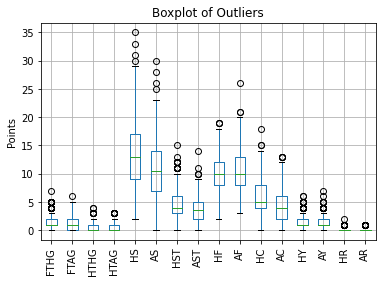

In [ ]:
# let's check for outliers in the dataset using boxplot and give it a title and label

# let's create a function to plot the boxplot
def plot_boxplot(data,title,label):
    data.boxplot()
    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylabel('Points')
    plt.show()

plot_boxplot(season18, 'Boxplot of Outliers', 'Points')


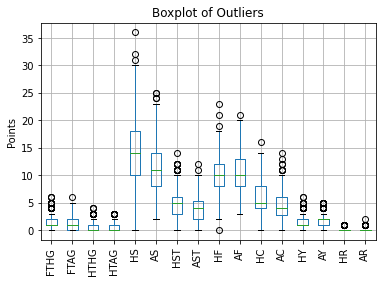

In [ ]:
plot_boxplot(season19, 'Boxplot of Outliers', 'Points')

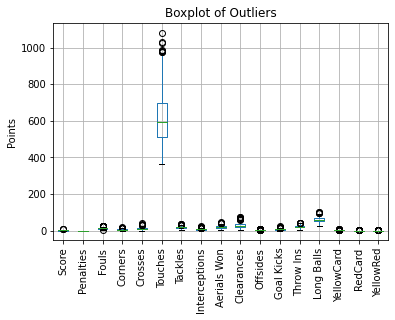

In [ ]:
plot_boxplot(season20, 'Boxplot of Outliers', 'Points')

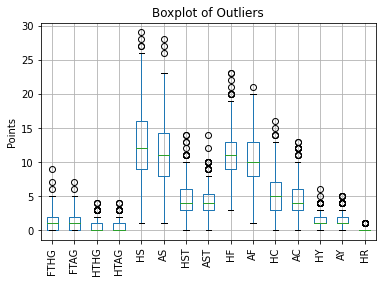

In [ ]:
plot_boxplot(season21, 'Boxplot of Outliers', 'Points')

In [ ]:
# anomolies in the dataset

# let's create a function to check for duplicate values
def check_duplicate_values(data):
    print(data.duplicated().sum())

print(check_duplicate_values(season18))
print(check_duplicate_values(season19))
print(check_duplicate_values(season20))
print(check_duplicate_values(season21))

0
None
0
None
0
None
0
None


In [ ]:
# let's check for missing data in the dataset
print(season18.isnull().sum().any())
print(season19.isnull().sum().any())
print(season20.isnull().sum().any())
print(season21.isnull().sum().any())

False
False
False
False


In [ ]:
# let's check for any entry that's not a string or an integer in the dataset
print(season18.select_dtypes(include=['object']).isnull().sum().any())
print(season19.select_dtypes(include=['object']).isnull().sum().any())
print(season20.select_dtypes(include=['object']).isnull().sum().any())
print(season21.select_dtypes(include=['object']).isnull().sum().any())


False
False
False
False


## 5. Exploratory Data Analysis

#### a) Univariate Analysis

In [ ]:
season18.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,...,10,3,9,12,9,4,0,1,0,0
1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,...,2,4,6,9,3,10,0,2,0,0
2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,...,6,5,16,11,8,5,3,3,2,0
3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,4,6,7,19,12,9,1,3,0,0
4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,...,4,1,13,10,6,7,1,1,0,0
5,E0,12/08/17,Southampton,Swansea,0,0,D,0,0,D,...,2,0,10,13,13,0,2,1,0,0
6,E0,12/08/17,Watford,Liverpool,3,3,D,2,1,H,...,4,5,14,8,3,3,0,3,0,0
7,E0,12/08/17,West Brom,Bournemouth,1,0,H,1,0,H,...,6,2,15,3,8,2,3,1,0,0
8,E0,13/08/17,Man United,West Ham,4,0,H,1,0,H,...,6,1,19,7,11,1,2,2,0,0
9,E0,13/08/17,Newcastle,Tottenham,0,2,A,0,0,D,...,3,6,6,10,5,7,1,2,1,0


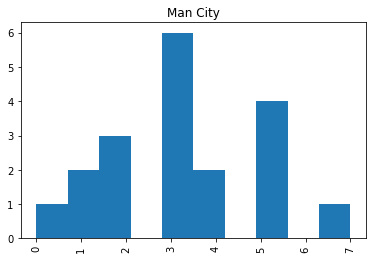

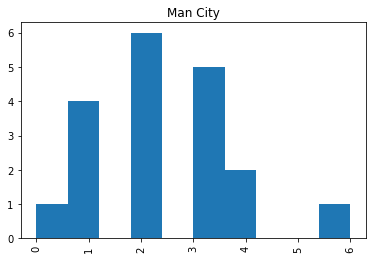

In [ ]:
# let's create a function that will plot the histogram of the total goals scored 
# by Manchester City as the home team for each season

def plot_histogram(season):
    Manchester1 = season[season['HomeTeam']=='Man City']
    Manchester2 = season[season['AwayTeam']=='Man City']
    Manchester1.hist(column='FTHG', by='HomeTeam')
    Manchester2.hist(column='FTAG', by='AwayTeam')

plot_histogram(season18)

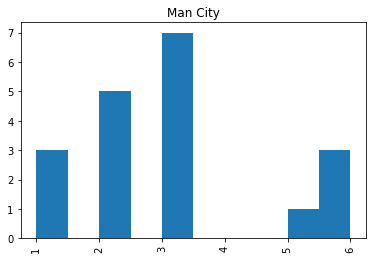

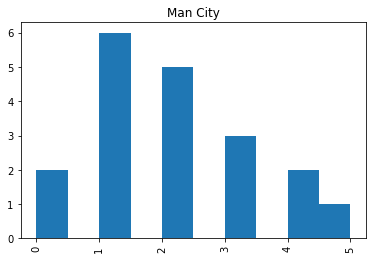

In [ ]:
plot_histogram(season19)

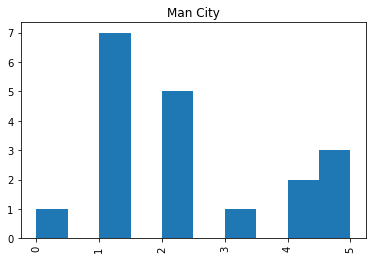

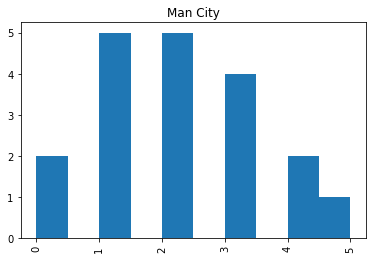

In [ ]:
plot_histogram(season21)

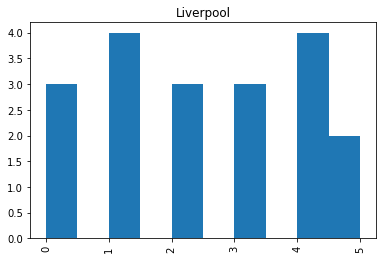

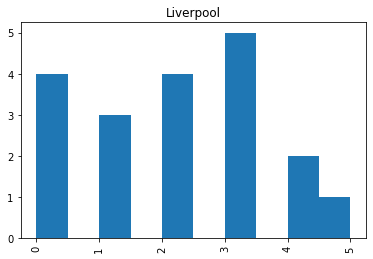

In [ ]:
# for liverpool
def plot_histogram(season):
    Manchester1 = season[season['HomeTeam']=='Liverpool']
    Manchester2 = season[season['AwayTeam']=='Liverpool']
    Manchester1.hist(column='FTHG', by='HomeTeam')
    Manchester2.hist(column='FTAG', by='AwayTeam')

plot_histogram(season18)

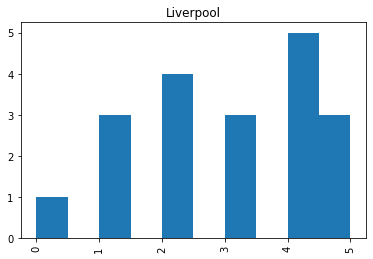

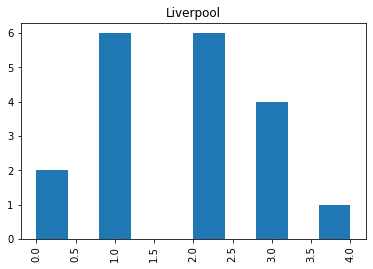

In [ ]:
plot_histogram(season19)

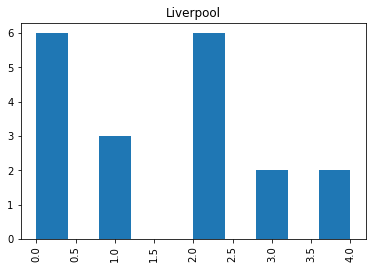

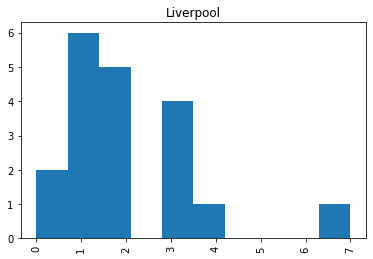

In [ ]:
plot_histogram(season21)

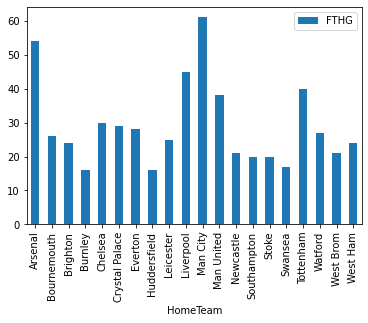

In [ ]:
# stacked bar chart
season18.groupby('HomeTeam').agg({'FTHG':'sum'}).plot.bar(stacked=True)

### Bivariate Analysis

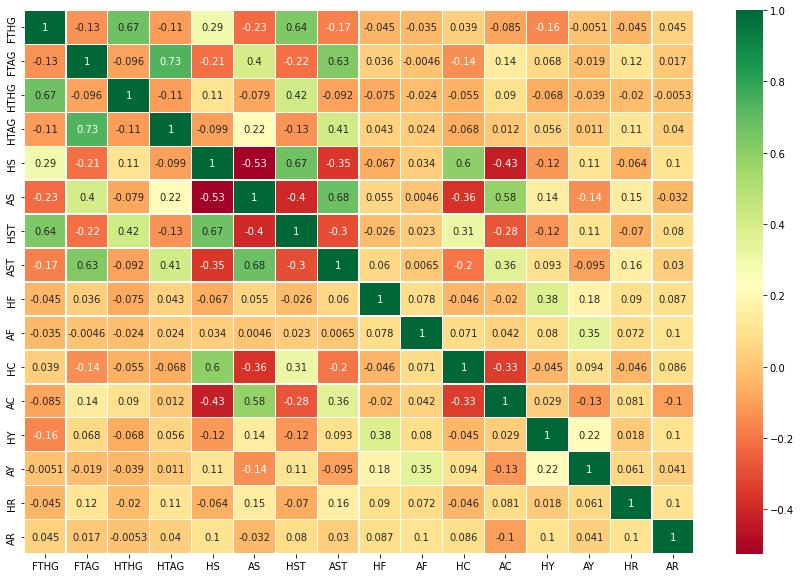

In [ ]:
# let's use a heatmap to plot the correlation between the features

#specify size of heatmap
fig, ax = plt.subplots(figsize=(15, 10))

#create seaborn heatmap
sns.heatmap(season18.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
